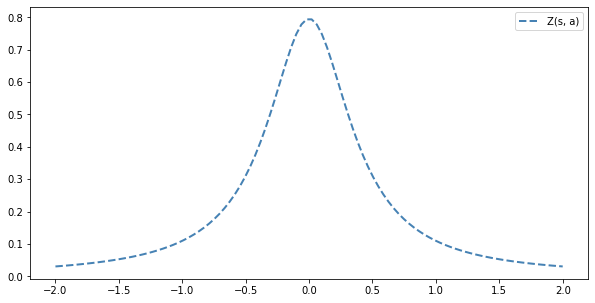

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


x = np.linspace(-2, 2, 100)
df = 1.
loc = 0.
scale = 0.4

plt.figure(figsize=(10, 5))
plt.plot(x, stats.t.pdf(x, df, loc, scale), c="steelblue", lw=2, linestyle="--", label="Z(s, a)")

plt.legend()

Ground truth is contiuous distribution.

## 1. Categorical DQN (C51)

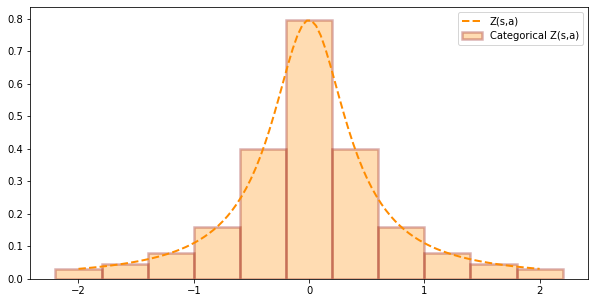

In [2]:
x = np.linspace(-2, 2, 100)
df = 1.
loc = 0.
scale = 0.4
supports = np.linspace(-2,2,11)

plt.figure(figsize=(10, 5))
plt.bar(supports, stats.t.pdf(supports, df, loc, scale), color="darkorange", linewidth=2.5, edgecolor="darkred", width=0.4 ,alpha=0.3, label="Categorical Z(s,a)")
#plt.scatter(supports, stats.t.pdf(supports, df, loc, scale), color="darkred")

plt.plot(x, stats.t.pdf(x, df, loc, scale), c="darkorange", lw=2, linestyle="--", label="Z(s,a)")
plt.legend()


### Applying Bellman operator

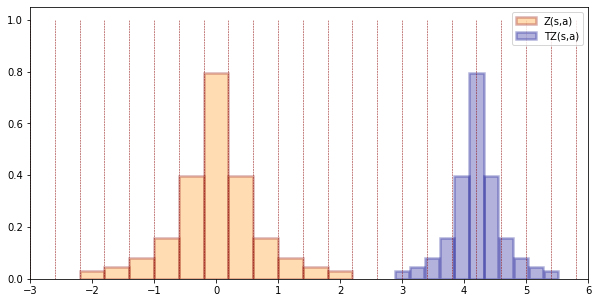

In [3]:
x = np.linspace(-4, 8, 100)
df = 1.
loc = 0.
scale = 0.4
supports = np.linspace(-2,2,11)

reward = 7.0
gamma = 0.6

plt.figure(figsize=(10, 5))
plt.bar(supports, stats.t.pdf(supports, df, loc, scale), 
        color="darkorange", linewidth=2.5, edgecolor="darkred", width=0.4 ,alpha=0.3, label="Z(s,a)")

plt.bar(gamma * (reward + supports), 
        stats.t.pdf(reward + supports, df, loc+reward, scale), color="darkblue", linewidth=2.5, edgecolor="darkblue", width=0.23 ,alpha=0.3,
        label="TZ(s,a)")

plt.vlines(np.arange(-4.2, 8, 0.4), ymin=0, ymax=1.0, linestyle="--", lw=0.5, color="darkred")
plt.xlim(-3,6)
plt.legend()

## 2. QR-DQN

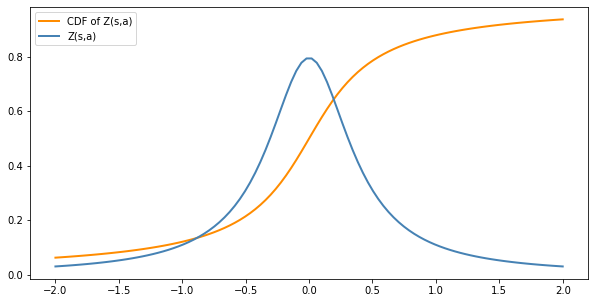

In [4]:
x = np.linspace(-2, 2, 100)
df = 1.
loc = 0.
scale = 0.4
supports = np.linspace(-2,2,11)

plt.figure(figsize=(10, 5))
plt.plot(x, stats.t.cdf(x, df, loc, scale), color="darkorange", lw=2, label="CDF of Z(s,a)")
plt.plot(x, stats.t.pdf(x, df, loc, scale), c="steelblue", lw=2, label="Z(s,a)")
plt.legend()

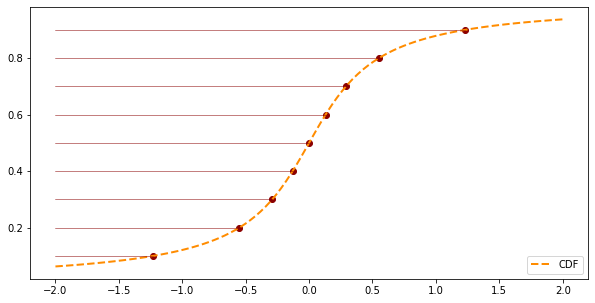

In [5]:

x = np.linspace(-2, 2, 100)
df = 1.
loc = 0.
scale = 0.4
quantiles = [0.1*i for i in range(1,10)]
supports = stats.t.ppf(quantiles, df, loc, scale)

plt.figure(figsize=(10, 5))
plt.plot(x, stats.t.cdf(x, df, loc, scale), color="darkorange", lw=2,  linestyle="--", label="CDF")
plt.scatter(supports, stats.t.cdf(supports, df, loc, scale), color="darkred")
plt.legend()

for qu, su in zip(quantiles, supports):
    plt.plot([-2, su], [qu, qu], c="darkred", lw=0.5)


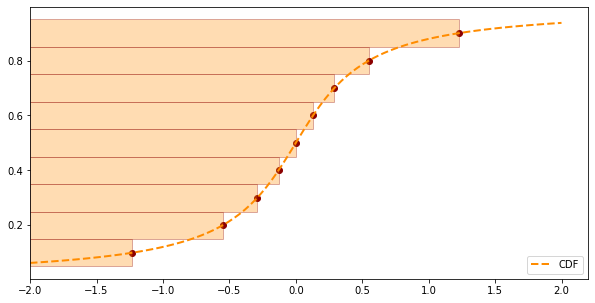

In [6]:
x = np.linspace(-2, 2, 100)
df = 1.
loc = 0.
scale = 0.4
quantiles = [0.1*i for i in range(1,10)]
supports = stats.t.ppf(quantiles, df, loc, scale)

plt.figure(figsize=(10, 5))
plt.plot(x, stats.t.cdf(x, df, loc, scale), color="darkorange", lw=2,  linestyle="--", label="CDF")
plt.scatter(supports, stats.t.cdf(supports, df, loc, scale), color="darkred")
plt.barh(quantiles, supports+2, alpha=0.3, height=0.1, align="center", left=-2, color="darkorange", edgecolor="darkred")
plt.legend()

for qu, su in zip(quantiles, supports):
    #plt.plot([-2, su], [qu, qu], c="darkred", lw=0.5)
    pass

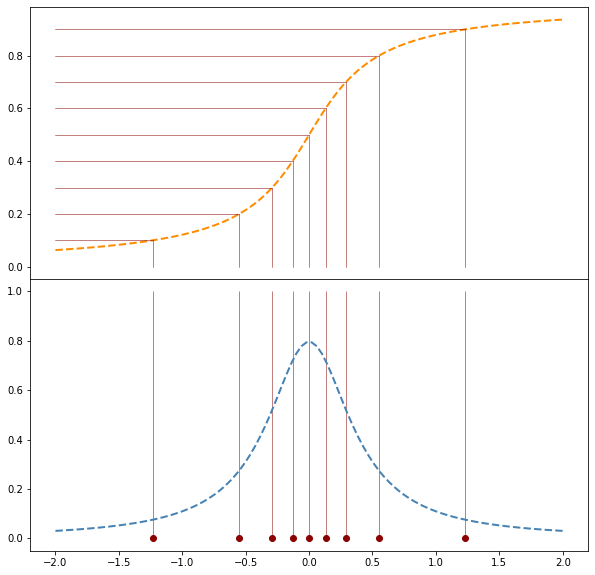

In [7]:
x = np.linspace(-2, 2, 100)
df = 1.
loc = 0.
scale = 0.4
quantiles = [0.1*i for i in range(1,10)]
supports = stats.t.ppf(quantiles, df, loc, scale)

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10, 10), sharex=True)
plt.subplots_adjust(hspace=0.)
ax1.plot(x, stats.t.cdf(x, df, loc, scale), color="darkorange", lw=2,  linestyle="--", label="CDF")
#ax1.scatter(supports, stats.t.cdf(supports, df, loc, scale), color="darkred")

for qu, su in zip(quantiles, supports):
    ax1.plot([-2, su], [qu, qu], c="darkred", lw=0.5)
    ax1.plot([su, su], [0, qu], c="darkred", lw=0.5)

ax2.plot(x, stats.t.pdf(x, df, loc, scale), c="steelblue", lw=2,  linestyle="--", label="PDF")
ax2.vlines(supports, ymin=0, ymax=1., color="darkred", lw=0.5)
#ax2.scatter(supports, stats.t.pdf(supports, df, loc, scale), color="steelblue")
for qu, su in zip(quantiles, supports):
    ax2.scatter([su], [0], c="darkred")

### Applying Bellman operator

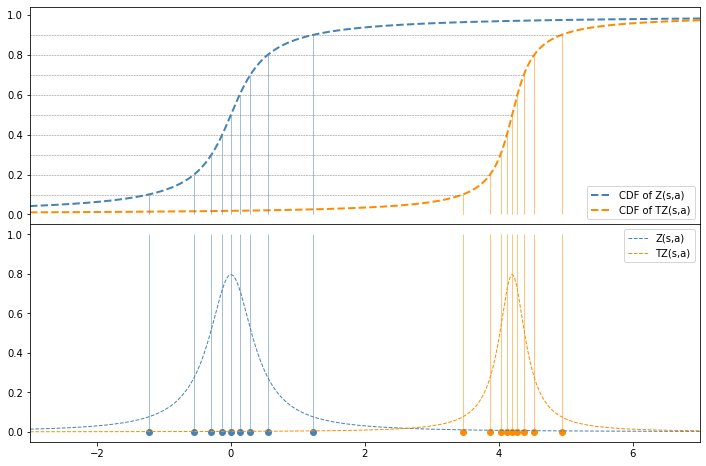

In [8]:
x = np.linspace(-3, 12, 1000)
df = 1.
loc = 0.
scale = 0.4

reward = 7.
gamma = 0.6

quantiles = [0.1*i for i in range(1,10)]
supports = stats.t.ppf(quantiles, df, loc, scale)
shifted_supports = gamma * stats.t.ppf(quantiles, df, loc+reward, scale)

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(12, 8), sharex=True)
plt.subplots_adjust(hspace=0.)

ax1.plot(x, stats.t.cdf(x, df, loc, scale), color="steelblue", lw=2,  linestyle="--", label="CDF of Z(s,a)")
ax2.plot(x, stats.t.pdf(x, df, loc, scale), color="steelblue", lw=1,  linestyle="--", label="Z(s,a)")


ax1.plot(x, stats.t.cdf((1/gamma)*x, df, loc+reward, scale), color="darkorange", lw=2,  linestyle="--", label="CDF of TZ(s,a)")
ax2.plot(x, stats.t.pdf((1/gamma)*x, df, loc+reward, scale), color="darkorange", lw=1,  linestyle="--", label="TZ(s,a)")

for qu, su in zip(quantiles, supports):
    #ax1.plot([-3, su], [qu, qu], c="gray", linestyle="--", lw=0.5)
    ax1.plot([su, su], [0, qu], c="steelblue", lw=0.5)

for qu, su in zip(quantiles, shifted_supports):
    ax1.plot([-3, su], [qu, qu], c="gray", linestyle="--", lw=0.5)
    ax1.plot([su, su], [0, qu], c="darkorange", lw=0.5)
    
ax2.vlines(supports, ymin=0, ymax=1., color="steelblue", lw=0.5)
for qu, su in zip(quantiles, supports):
    ax2.scatter([su], [0], c="steelblue")
    
ax2.vlines(shifted_supports, ymin=0, ymax=1., color="darkorange", lw=0.5)
for qu, su in zip(quantiles, shifted_supports):
    ax2.scatter([su], [0], c="darkorange")

plt.xlim(-3, 7)
ax1.legend()
ax2.legend()